In [ ]:
import numpy as np
import random
import os
import pandas as pd
seed=9999
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [ ]:
!pip install tomotopy

In [ ]:
!pip install gensim

In [ ]:
!pip install konlpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
revieww = pd.read_csv('/content/drive/MyDrive/금융콘테스트2021/강남구_일식돈까스_매출추가.csv')
revieww= revieww.rename(columns={'리뷰 내용':'review'})

lst = pd.read_csv('/content/drive/MyDrive/금융콘테스트2021/강남구_일식_세부업종.csv')

In [ ]:
lst

,url,개수충족,가게명,세부 업종
0,https://www.yogiyo.co.kr/mobile/#/237758/,1,김뿌라스시,횟집
1,https://www.yogiyo.co.kr/mobile/#/258523/,1,육회와스시한판,초밥
2,https://www.yogiyo.co.kr/mobile/#/258524/,1,스시데이,초밥
3,https://www.yogiyo.co.kr/mobile/#/488017/,1,노량진수산시장벌교아줌마,횟집
4,https://www.yogiyo.co.kr/mobile/#/372574/,1,참치의명가&야식포차,횟집
...,...,...,...,...
204,https://www.yogiyo.co.kr/mobile/#/381989/,1,미카,돈까스
205,https://www.yogiyo.co.kr/mobile/#/354665/,1,제이돈까스,돈까스
206,https://www.yogiyo.co.kr/mobile/#/513752/,1,지구당-신사점,종합
207,https://www.yogiyo.co.kr/mobile/#/430995/,1,덮밥&이자카야달아,덮밥/가정식


In [ ]:
# 일식 -  초밥
lst_초밥 = []
for index in range(len(lst)):
  label = lst.loc[index, '세부 업종']
  if '초밥' in label:
    lst_초밥.append(lst.loc[index,'가게명'])

# 일식 -  횟집
lst_횟집 = []
for index in range(len(lst)):
  label = lst.loc[index, '세부 업종']
  if ('횟집' in label) or ('횟집 ' in label):
    lst_횟집.append(lst.loc[index,'가게명'])

# 일식 -  라멘
lst_라멘 = []
for index in range(len(lst)):
  label = lst.loc[index, '세부 업종']
  if '라멘' in label:
    lst_라멘.append(lst.loc[index,'가게명'])

# 일식 -  종합일식
lst_종합일식 = []
for index in range(len(lst)):
  label = lst.loc[index, '세부 업종']
  if ('돈까스' in label) or ('덮밥/가정식' in label) or ('카레' in label) or ('종합' in label) or ('우동' in label) or ('샤브샤브' in label):
    lst_종합일식.append(lst.loc[index,'가게명'])

In [ ]:
# # 일식 -  초밥
# lst_초밥 = []
# for index in range(len(lst)):
#   label = lst.loc[index, '라벨']
#   if '초밥' in label:
#     lst_초밥.append(lst.loc[index,'가게명'])

# # 일식 -  횟집
# lst_횟집 = []
# for index in range(len(lst)):
#   label = lst.loc[index, '라벨']
#   if '횟집' in label:
#     lst_횟집.append(lst.loc[index,'가게명'])

# # 일식 -  라멘
# lst_라멘 = []
# for index in range(len(lst)):
#   label = lst.loc[index, '라벨']
#   if '라멘' in label:
#     lst_라멘.append(lst.loc[index,'가게명'])

# # 일식 -  종합일식
# lst_종합일식 = []
# for index in range(len(lst)):
#   label = lst.loc[index, '라벨']
#   if '종합일식' in label:
#     lst_종합일식.append(lst.loc[index,'가게명'])

In [ ]:
revieww = revieww[revieww['가게명'].isin(lst_종합일식)]
lst = list(revieww.review)

In [ ]:
revieww

,Unnamed: 0,시,구,업종명,가게명,년,월,전체평점,맛 평점,양 평점,배달 평점,review,주문 내역,주문 금액
32478,32478,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,5.0,5.0,여러번 주문했던 음식점이예요 돈까스 바삭하고 맛있어요,"\n 모짜렐라치즈까스/2,생생돈까스/1,옛날돈까스/1\n ...",39000.0
32479,32479,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,4,4.0,4.0,5.0,빠른 배달 잘 먹었어요~,"\n 프리미엄생생돈까스 /1,모짜렐라치즈까스/1\n",11000.0
32480,32480,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,5.0,5.0,항상 언제나 같은 맛집입니다.,\n 생생돈까스정식/2(추가 선택(소우동>미니냉메밀로 변경))\...,22000.0
32481,32481,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,4.0,4.0,"맛있는 음식에 꽂히면 한 음식을 자주 먹는데, 너무 맛있어요!",\n 프리미엄생생돈까스 /2\n,0.0
32482,32482,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,4,4.0,5.0,5.0,맛이 괜찮아요. 잘 먹었습니다~,"\n 생생돈까스/1,돈까스덮밥（가츠동）/1\n",16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89133,89133,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,6,4,5.0,4.0,5.0,외국인 여자친구랑 저녁늦게 먹었는데 맛있었네요! 전 사이드로 나온 북어국 맛있는데 ...,"\n 생연어덮밥/1,아보카도 생연어덮밥/1,콜라/1\n ...",28000.0
89134,89134,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,4,5,5.0,5.0,4.0,처음 시켰는데 친절한 손 메모로 감동^^ 광어회도 훌륭하고 덮밥도 은근히 맛있어요 ...,"\n 아보카도 생연어덮밥/1,광어 사시미/1\n",37000.0
89135,89135,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,3,5,5.0,5.0,5.0,아보카도 싱싱하고 특히 연어가 두툼두툼 씹히는게 만족스러웠어요~! 깔끔하고 맛있었어요^^,\n 아보카도 생연어덮밥/1\n,14000.0
89136,89136,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,3,5,5.0,5.0,5.0,또 시킬려구요. 정성스럽게 만들었습니다 라는 정성스런 편지를 받았는데 정말로 정성스...,\n 아보카도 생연어덮밥/1\n,14000.0


## **LDA Modeling**

In [ ]:
from konlpy.tag import Okt
kkma = Okt()

In [ ]:
import re

In [ ]:
dataset = []
for i in range(len(lst)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]', '', str(lst[i]))))

In [ ]:
stopwords = ['진짜', '번창', '종종', '자주', '조금', '여기', '잘먹엇습니', '냉면', '돈까스', '떡볶이', '김밥', '닭발', '카레', '찜닭', '그냥', '주문', '정말', '고기', '항상', '다음', '최고', '오늘', '튀김', '순대', '만두',
             '당면', '역시', '존맛', '아주', '먹기', '정도', '생각', '간장', '게장', '삼겹살', '돈가스', '치즈', '안나', '갈비', '쌀국수', '굿굿', '돼지', '비빕밥', '살짝', '족발', '곱창', '오징어', '아구찜', '아구',
             '닭도리탕', '해물찜', '미더덕', '감자', '치킨','제육', '완전', '간장게장', '국수', '비냉', '비빔밥', '김치찌개', '찌개', '별로', '저번', '이번', '사진', '무난', '차돌', '볶음', '찌게', '순두부', 
             '삼겹', '다만', '만족', '대비', '추천', '대박', '추천', '사리', '고구마', '라면', '달라', '어제', '덕분', '돌뼈', '콩나물국', '약간', '불맛',
             '한번', '계속', '물냉면','비빔냉면', '살얼음', '매번', '비빔', '요기', '함흥', '머리카락','전도', '잘못','쭈꾸미','물냉','아들','개인','매우','실망','모두','무엇',
             '처음','우동','갑자기','석쇠','얼음','닭강정','최악','배기','냉면집','제일','제대로','장난', '강추','무슨','사람','면사무소','보고','짐해','해장국','다른','전체', '원래','요즘','다시', '이제', '장용','런가',
             '전이','이건','이유','불고기','깜빡','고기랑','짱짱','기대','오지','먹음','한지','일단','언제','일단','해도','칼국수','사업','두번째','당황','보통','혹시','때문',
             '국밥','된장찌개','아이','맛집','일반','혜자','감동','참고','이집','대신','예전','가끔','뭔가','가끔','평타','맛보기','이상', '꿀맛','읍니','맜있네','거의','기도','고민',
             '비도', '적극', '바람','기요','호불호', '아쉬움', '전반', '별하나','무조건','와이프','전혀','보쌈','흡입','쵝오','애기','동네','감안','맛잇엇어','누락','중간','가게','매일','말씀','전문점','음식점',
             '비빔국수','후회','좀더','하나','매장','일주일','부분','편이','장사','수도','일찍','는걸','거기','깜짝','쫄면','완료','친구','이적','여름','신경','저녁','점심시간','된장','비빔면','강정','코로나',
             '고기만','의사','인정','해물','육개장','기분','날씨','식당','분도','생선','취향','감사','기본','푸드','왕만','추강','느낌','개선','바로','실수','새벽','간만','미니','명태','음식','주시','냉이','한식','해장','식사','주심','리뷰',
             '선택','사항','집밥','모밀','충무김밥','번은','엇습','재주','벌써','최애','중독','차고','까스','콩국수','나용','부어','자꾸','자마자','엄마','점점','겨울','별개',
             '내내', '세번', '박지', '몇번','굿굿굿','지금','아예','잘먹엇어', '순삭', '평소','예전','다가','찰떡','다대기', '먹엇어', '하루', '아이디', '지난번','일품','무지','환상','더더','근처', '회사', '직접', '평점', '오히려',
             '절대','동안','닉네임','진심','수고','한가지','부탁','최소', '반영','낙지','동동','다데기','강남','사실','허겁지겁','대안','장님','역삼','그대로','잔치국수','사무실','신건','주말', '부족', '나중','맛남',
             '가요', '발도', '신청','자체','오오오오오','소독약','최근','미리', '만두국', '마음','걱정','체크','또한','참여','충무','기전','여유', '옵션', '수로','떡갈비','전부','애용','더욱더','이나','서비스','방금', '그거', '이틀','그것',
             '게다가','메모','새해','프로','부담','이용','포장','가스','볶음밥','가장','확인','센스','메밀','살살','요새','워낙','지인','어플','진리','덩어리','엄지','클리어','아유','옛날','문제','대충','신랑','한마디','야근','만큼',
             '어유','조만간','가위','사랑','한참','설명', '녹지', '먹엇습니당', '오해','실화', '번시', '올여름', '기고','요리','얼마나','시작','연락','미역국','물만두','계절','생선까스','밍밍','그게','천원','며칠','금액','점심',
             '하여튼','놀람','인지','저희', '넘흐','진짜진짜','행복','고요','나머지','근래','어디','그동안','개도','뚝딱','아빠','수준','충격','열무김치','더욱','가족','무가','가지','여름밤','단지','세용','사장','김말이','멸치']

In [ ]:
for i in range(len(dataset)):
    datas= dataset[i]
    print(datas)
    for word in datas:
        if word in stopwords:
            print(word)
            dataset[i].remove(word)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[]
['맛', '양도', '점', '고춧가루', '중국산', '것']
['맛', '맛', '때', '정성', '더', '것', '더', '툼', '늘', '짐']
[]
['번', '맛', '매콤', '조합', '요']
['때', '맛', '맛']
['맛', '양도', '워', '분', '또']
[]
[]
['육수']
['양도']
[]
['둘', '배달', '요청']
[]
['집']
['맛완맛존맛', '맛', '끼']
[]
['양도', '배달']
['배달', '료', '때', '정성']
['늘', '맛']
['양도', '구', '맛', '참기름', '맛', '어어', '무']
['전', '오', '일식집', '거', '두툼']
['천년', '만년']
[]
['배달', '정밀', '날', '제', '맛', '육수', '무초', '절임', '또']
['골', '골', '논현', '이사', '일욜날', '이사삼', '잔', '득시', '쿠폰', '한장']
['굿']
['곳', '또']
['맛', '성의']
['입맛', '때', '조합']
['왜케', '툼해']
['양은', '맛']
['육수', '본인', '입맛']
[]
['양']
['구매', '평', '햇', '해']
['그때', '궁합']
['양', '맛', '두툼']
['주', '집', '요청']
['배달', '비', '꼭', '번', '마약', '비법', '뭐']
['맛', '습', '더']
[]
['면', '불어']
['존존맛', '만']
['소스', '명', '추가', '보', '소스']
['맛']
['좀']
['무', '김치', '담']
['집']
['또']
['연속', '아뒤', '용', '연속', '맛', '분만', '배달']
['배달', '분', '픽업', '후', '면', '예상', '더']
['지난주', '매콤', '맛', '요']
['맛', '요', '요청', '육수', '여러분', '따윈']
['배달']
['사이드', '바삭']

In [ ]:
high_score_reviews = [[y for y in x if not len(y) == 1] for x in dataset]

In [ ]:
print(len(high_score_reviews))
for review in high_score_reviews:
    if len(review) == 0:
        high_score_reviews.remove(review)
print(len(high_score_reviews))

6435
4578


In [ ]:
from gensim import corpora, models
import gensim

dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [ ]:
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary,iterations=100)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [ ]:
import matplotlib.pyplot as plt


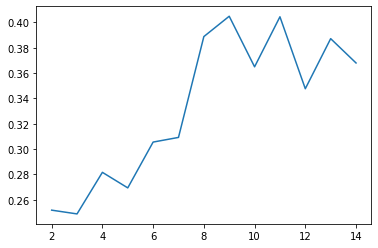

In [ ]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.show()

In [ ]:
perplexity_values=[]
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

In [ ]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.show()

In [ ]:
high_score_reviews

In [ ]:
import tomotopy as tp

import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model = tp.LDAModel(k=9
                    , alpha=0.1, eta=0.01, min_cf=10, tw=tp.TermWeight.ONE, rm_top=4, seed= seed)
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.
 
# 다음 구문은 input_file.txt 파일에서 한 줄씩 읽어와서 model에 추가합니다.
for i, line in enumerate(high_score_reviews):
    try:
        model.add_doc(line) # 공백 기준으로 단어를 나누어 model에 추가합니다.
        if (i % 10) == 0:
            print('Document #{} has been loaded'.format(i))
    except: continue
 
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(1)
print(model.removed_top_words)
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Document #0 has been loaded
Document #10 has been loaded
Document #20 has been loaded
Document #30 has been loaded
Document #40 has been loaded
Document #50 has been loaded
Document #60 has been loaded
Document #70 has been loaded
Document #80 has been loaded
Document #90 has been loaded
Document #100 has been loaded
Document #110 has been loaded
Document #120 has been loaded
Document #130 has been loaded
Document #140 has been loaded
Document #150 has been loaded
Document #160 has been loaded
Document #170 has been loaded
Document #180 has been loaded
Document #190 has been loaded
Document #200 has been loaded
Document #210 has been loaded
Document #220 has been loaded
Document #230 has been loaded
Document #240 has been loaded
Document #250 has been loaded
Document #260 has been loaded
Document #270 has been loaded
Document #280 has been loaded
Document #290 has been loaded
Document #300 has been loaded
Document #310 has been loaded
Document #320 has been loaded
Document #330 has bee

In [ ]:
model.save('/content/drive/MyDrive/공모전/금융콘테스트2021/강남구_종합일식')

## **Infer**

In [ ]:
import tomotopy as tp
from konlpy.tag import Okt
import re

In [ ]:
def inference_topic(model_name , review_dataset):
  save_path = '/content/drive/MyDrive/금융콘테스트2021/' + model_name
  mdl = tp.LDAModel.load(save_path)
  data = review_dataset
  review_list = list(data.review)
  
  t = Okt()
  dataset = []
  for i in range(len(review_list)):
    dataset.append(t.nouns(re.sub('[^가-힣a-zA-Z\s]', '', str(review_list[i]))))
  revieww['token'] = dataset

  high_score_reviews = dataset
  topic_score = []
  for i in range(len(high_score_reviews)):
    try:
      docs = mdl.make_doc(high_score_reviews[i])
      topic_score.append(mdl.infer(docs)[0])
    except:
      topic_score.append([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99999])

  dataset_with_topic = revieww
  dataset_with_topic['topic_score'] = topic_score
  dataset_with_topic['topic_label'] = dataset_with_topic.topic_score.apply(lambda x: np.argmax(x))
  filename = '/content/drive/MyDrive/금융콘테스트2021/'+ model_name + '_dataset_topic.csv'
  dataset_with_topic.to_csv(filename, encoding='utf-8')
  return dataset_with_topic

In [ ]:
inference_topic('강남구_종합일식1' , revieww)

,Unnamed: 0,시,구,업종명,가게명,년,월,전체평점,맛 평점,양 평점,배달 평점,review,주문 내역,주문 금액,token,topic_score,topic_label
32478,32478,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,5.0,5.0,여러번 주문했던 음식점이예요 돈까스 바삭하고 맛있어요,"\n 모짜렐라치즈까스/2,생생돈까스/1,옛날돈까스/1\n ...",39000.0,"[번, 주문, 음식점, 돈까스, 바삭]","[0.051775053, 0.07141773, 0.30982882, 0.099577...",2
32479,32479,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,4,4.0,4.0,5.0,빠른 배달 잘 먹었어요~,"\n 프리미엄생생돈까스 /1,모짜렐라치즈까스/1\n",11000.0,[배달],"[0.10104514, 0.13938014, 0.12885849, 0.1943368...",3
32480,32480,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,5.0,5.0,항상 언제나 같은 맛집입니다.,\n 생생돈까스정식/2(추가 선택(소우동>미니냉메밀로 변경))\...,22000.0,"[항상, 맛집]","[0.10104514, 0.13938014, 0.12885849, 0.1943368...",3
32481,32481,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,5,5.0,4.0,4.0,"맛있는 음식에 꽂히면 한 음식을 자주 먹는데, 너무 맛있어요!",\n 프리미엄생생돈까스 /2\n,0.0,"[음식, 음식, 자주]","[0.10104514, 0.13938014, 0.12885849, 0.1943368...",3
32482,32482,서울,강남구,일식돈까스,생생돈까스-논현점,2021,7,4,4.0,5.0,5.0,맛이 괜찮아요. 잘 먹었습니다~,"\n 생생돈까스/1,돈까스덮밥（가츠동）/1\n",16000.0,[맛],"[0.10104514, 0.13938014, 0.12885849, 0.1943368...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89133,89133,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,6,4,5.0,4.0,5.0,외국인 여자친구랑 저녁늦게 먹었는데 맛있었네요! 전 사이드로 나온 북어국 맛있는데 ...,"\n 생연어덮밥/1,아보카도 생연어덮밥/1,콜라/1\n ...",28000.0,"[외국인, 여자친구, 저녁, 전, 사이드, 북어, 국, 여자친구, 입맛, 안, 대신...","[0.051775053, 0.07141773, 0.06602649, 0.343379...",3
89134,89134,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,4,5,5.0,5.0,4.0,처음 시켰는데 친절한 손 메모로 감동^^ 광어회도 훌륭하고 덮밥도 은근히 맛있어요 ...,"\n 아보카도 생연어덮밥/1,광어 사시미/1\n",37000.0,"[처음, 손, 메모, 감동, 광어, 회도, 밥, 은근, 이, 맛, 유지]","[0.04162643, 0.057418875, 0.05308439, 0.080058...",4
89135,89135,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,3,5,5.0,5.0,5.0,아보카도 싱싱하고 특히 연어가 두툼두툼 씹히는게 만족스러웠어요~! 깔끔하고 맛있었어요^^,\n 아보카도 생연어덮밥/1\n,14000.0,"[아보카도, 연어, 두툼두툼]","[0.068467624, 0.09444321, 0.08731379, 0.454087...",3
89136,89136,서울,강남구,일식돈까스,덮밥&이자카야달아,2020,3,5,5.0,5.0,5.0,또 시킬려구요. 정성스럽게 만들었습니다 라는 정성스런 편지를 받았는데 정말로 정성스...,\n 아보카도 생연어덮밥/1\n,14000.0,"[또, 구, 정성, 편지, 정성, 맛, 야식, 반드시, 또, 저]","[0.04162643, 0.057418875, 0.05308439, 0.080058...",4
